In [6]:
#pip install librosa

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

<font color='purple'> 
CREMA-D Samples
</font>

c:\Users\maisa\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


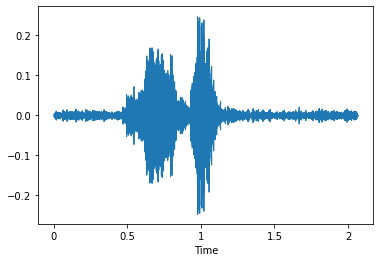

In [2]:
# Angry
sample_C1 , sr_C1 = librosa.load('../data/audio/1001_IEO_ANG_LO.wav', sr=16000)
librosa.display.waveshow(sample_C1 , sr_C1)

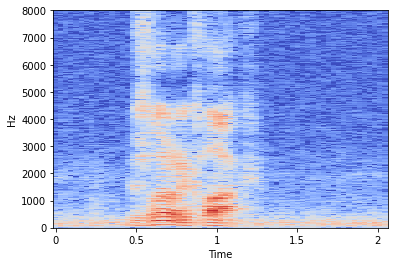

In [3]:
# Spectrogram of frequency
X_C1 = librosa.stft(sample_C1)
Xdb_C1 = librosa.amplitude_to_db(abs(X_C1))
librosa.display.specshow(Xdb_C1, sr=sr_C1, x_axis='time', y_axis='hz')
plt.savefig('spec3.png')

c:\Users\maisa\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


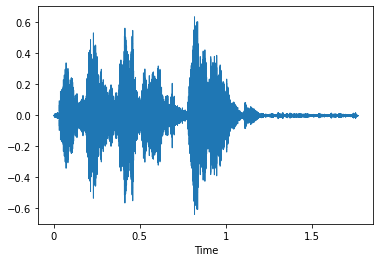

In [8]:
# Happy
sample_C2 , sr_C2 = librosa.load('../data/audio/1001_IEO_HAP_HI.wav', sr=16000)
librosa.display.waveshow(sample_C2 , sr_C2)

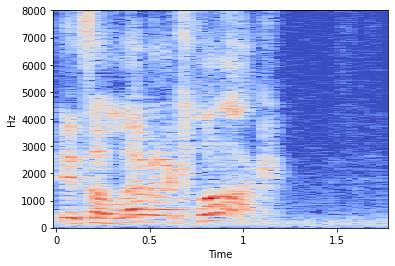

In [9]:
# Spectrogram of frequency
X_C2 = librosa.stft(sample_C2)
Xdb_C2 = librosa.amplitude_to_db(abs(X_C2))
librosa.display.specshow(Xdb_C2, sr=sr_C2, x_axis='time', y_axis='hz')

### Explore Data using audiosegment module in pydub

##### 1. Audio-Segment metadata summary

In [12]:
from pydub import AudioSegment

In [13]:
# Load files - C2
audio_segment = AudioSegment.from_file('../data/audio/1001_IEO_HAP_HI.wav')

In [14]:
# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")     #Hz sample rate
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 16000
Frame width: 2
Length (ms): 1768
Frame count: 28295.0
Intensity: -20.965719379812548


##### 2. Visualize the amplitude over time

In [15]:
import wave

In [16]:
# Open wav file and read frames as bytes
sf_filewave = wave.open('../data/audio/1001_IEO_HAP_HI.wav', 'r')
signal_sf = sf_filewave.readframes(-1)

In [17]:
# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')

In [18]:
# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()

In [19]:
# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                      stop=len(soundwave_sf)/framerate_sf,
                      num=len(soundwave_sf))

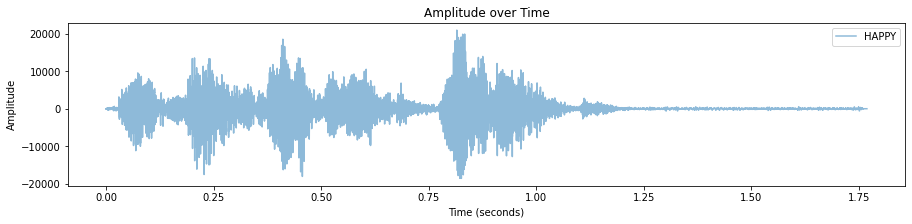

In [22]:
# Set up plot
f, ax = plt.subplots(figsize=(15, 3))

# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the audio data to the plot
ax = plt.plot(time_sf, soundwave_sf, label='HAPPY', alpha=0.5)
plt.legend()
plt.show()

##### 3. Spectogram

visual representation of the spectrum of frequencies of a signal as it varies with time. It is usually depicted as a heat map, with the intensity shown on varying color gradients.
\

The vertical axis shows frequency, 
the horizontal axis shows the time of the clip, 
and the color variation shows the intensity of the audio wave.

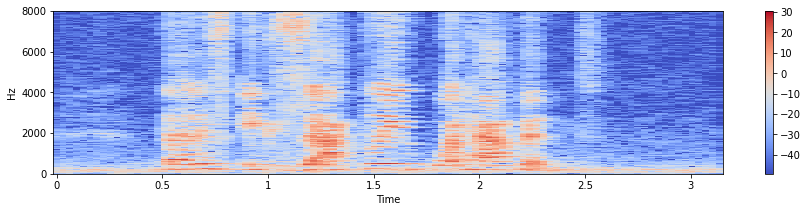

In [26]:
#Sample C3 - SAD (sr pre-defined)
xt, srt = librosa.load('../data/audio/1002_TIE_SAD_XX.wav', sr=16000)

# Spectrogram of frequency
Xt = librosa.stft(xt)
Xdbt = librosa.amplitude_to_db(abs(Xt))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdbt, sr=srt, x_axis='time', y_axis='hz')
plt.colorbar()

##### 4. Root-mean-square (RMS)

The total magnitude of the signal / the loudness or energy parameter of the audio file 

In [27]:
# Sample C3 - SAD
y, sr = librosa.load('../data/audio/1002_TIE_SAD_XX.wav', sr=16000)

In [28]:
# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

[Text(0.5, 1.0, 'log Power spectrogram')]

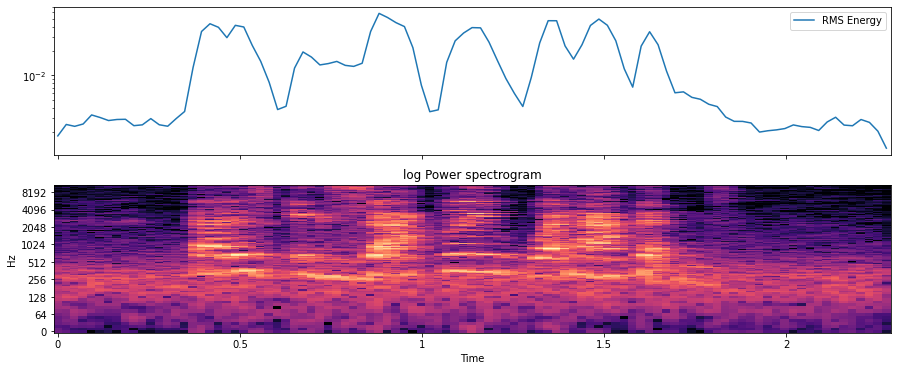

In [30]:
# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='log Power spectrogram')

In [31]:
# Sample C4 - Angry (high)
y4, sr4 = librosa.load('../data/audio/1003_IEO_ANG_HI.wav', sr=16000)

In [32]:
# Get RMS value from each frame's magnitude value
S4, phase4 = librosa.magphase(librosa.stft(y4))
rms4 = librosa.feature.rms(S=S4)

[Text(0.5, 1.0, 'log Power spectrogram')]

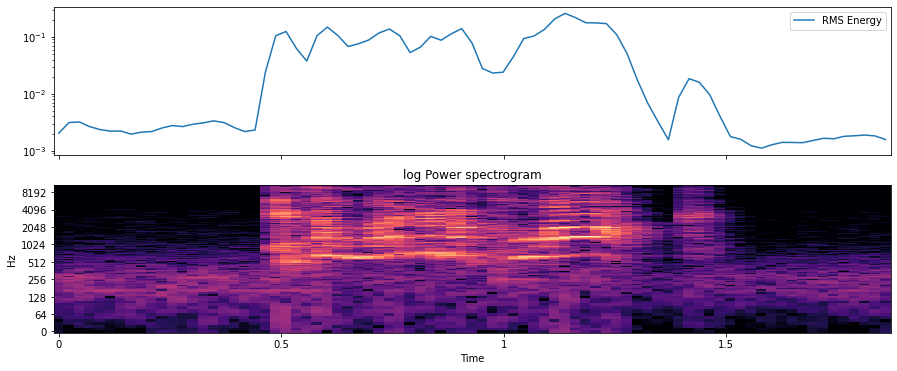

In [33]:
# Plot the RMS energy
fig4, ax4 = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times4 = librosa.times_like(rms4)
ax4[0].semilogy(times4, rms4[0], label='RMS Energy')
ax4[0].set(xticks=[])
ax4[0].legend()
ax4[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S4, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax4[1])

ax4[1].set(title='log Power spectrogram')

#### 5. Zero crossing rate

The rate at which a signal changes from positive to zero to negative or from negative to zero to positive.

Zero crossing rate: 5279


Text(0.5, 1.0, 'Angry-High')

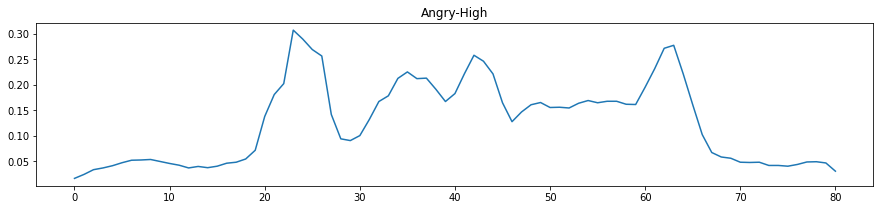

In [34]:
# Sample C4 - Angry (high), y4 sr4
zcrs4 = librosa.feature.zero_crossing_rate(y4)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(y4))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs4[0])
plt.title('Angry-High')

##### 5. Mel-Frequency Cepstral Coefficients (MFCCs)

A representation of the short-term power spectrum of a sound, based on some transformation in a Mel-scale.

c:\Users\maisa\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[3.2958984e-03 2.8686523e-03 2.3193359e-03 ... 1.5258789e-04 6.1035156e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


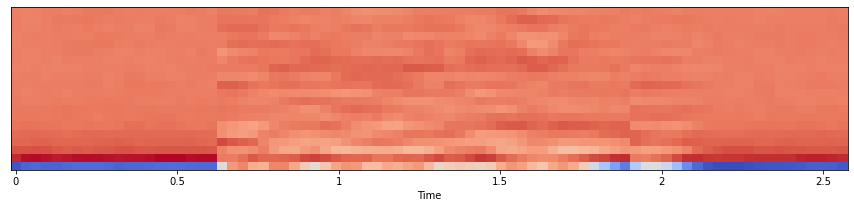

In [35]:
# Sample C4 - Angry (high), y4 sr4
mfccs4 = librosa.feature.mfcc(y4, sr=sr4)

# Displaying  the MFCCs:
plt.figure(figsize=(15, 3))
librosa.display.specshow(mfccs4, sr=sr4, x_axis='time')

##### 6. Chroma

visualization to know how dominant the characteristics of a certain pitch {C, C♯, D, D♯, E, F, F♯, G, G♯, A, A♯, B} is.

c:\Users\maisa\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[3.2958984e-03 2.8686523e-03 2.3193359e-03 ... 1.5258789e-04 6.1035156e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


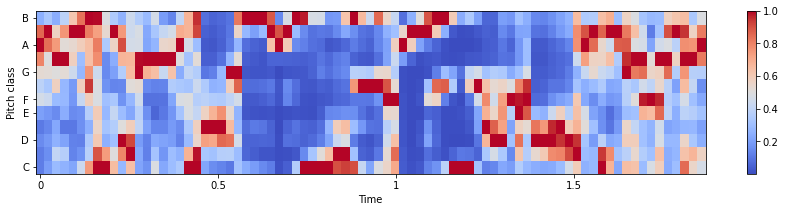

In [36]:
# Sample C4 - Angry (high), y4 sr4
hop_length = 512
chromagram = librosa.feature.chroma_stft(y4, sr=sr4, hop_length=hop_length)
fig4, ax4 = plt.subplots(figsize=(15, 3))
img4 = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
fig.colorbar(img4, ax=ax4)

##### 7. Tempogram

the speed of an audio piece, which is usually measured in beats per minute (bpm) units. 

[Text(0.5, 1.0, 'Tempogram')]

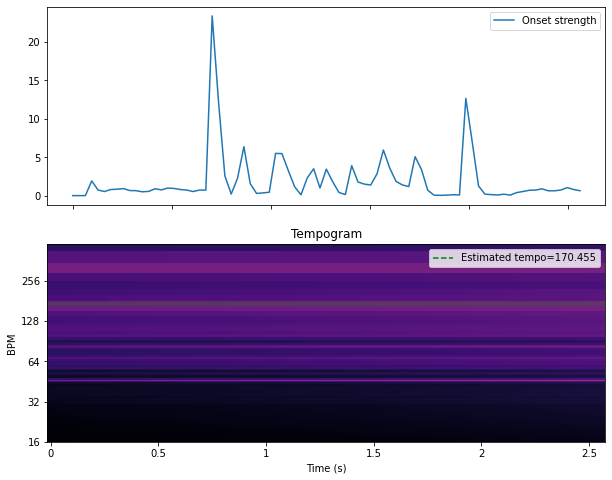

In [38]:
# Sample C4 - Angry (high), y4 sr4
oenv = librosa.onset.onset_strength(y=y4, sr=sr4)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr4)

# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)

# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr4)[0]
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))
times = librosa.times_like(oenv, sr=sr4)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr4, x_axis='s', 
     y_axis='tempo', cmap='magma',ax=ax[1])
ax[1].axhline(tempo, color='g', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')

### Importing and pre-processing of Data (Script prep)

In [75]:
import os

In [77]:
files

['1001_IWL_HAP_XX.wav',
 '1001_TSI_NEU_XX.wav',
 '1002_IEO_HAP_HI.wav',
 '1002_MTI_DIS_XX.wav',
 '1002_WSI_ANG_XX.wav']

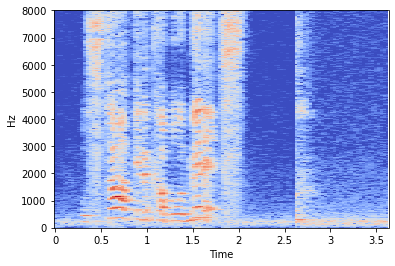

In [15]:
# loop through the files, import audio.wav, create Spectogram, save it to output folder
files = os.listdir('data/sample')

for file in files:
    name = file.split('.')[0]
    x, sr = librosa.load(f'data/sample/{file}', sr=16000)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.savefig(f'data/sample_output/{name}.png')


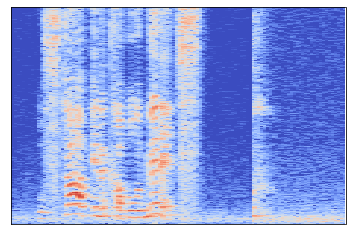

In [16]:
for file in files:
    name = file.split('.')[0]
    x, sr = librosa.load(f'data/sample/{file}', sr=16000)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr)
    plt.savefig(f'data/sample_output/{name}.png')

In [ ]:
# loop through images and create arrays... append to X and y    (taken from image classifier - adapt)

In [ ]:
# empty lists to collect X-image arrays, y- corresponding labels
X = []
y = []

# set names of categories (corresponding to folder names)
classes = ['book', 'cutlery', 'face', 'gesture', 'glass', 'mug', 'pen', 'shoe']
# Numeric-   0        1          2        3         4       5       6      7 

dict_classes = {i:target for i, target in enumerate(classes)}

In [ ]:
# loop through folders and import images - convert each image to an array, append it to X, append category number to y
for i, target in enumerate(classes):
    files = os.listdir(f'images/{target}')
    for file in files:
        image = load_img(f'images/{target}/{file}')
        image_array = np.array(image)
        # here create dictionarry entry   -  check numpy arrays and if they have indicies... importand for keeping track after the shuffel and train-test split
        X.append(image_array)
        y.append(i)

In [ ]:
# turn lists into arrays
X = np.array(X)
y = np.array(y)

In [ ]:
# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]